# Computational Physics HW 3
## Matt Catalano and Ian Pimenta

### Problem 1

Linear Fit Final Results

y(x) = a + b x
a =  3.517370894128999 +/- 0.5788623196249563
b =  -0.034678369921285535 +/- 0.008362420100070907
correlation = -0.8667781422175382


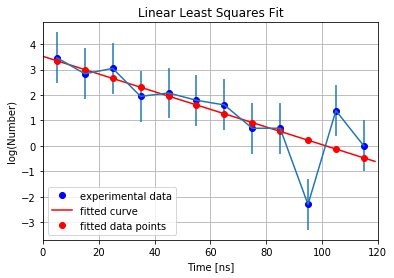

In [116]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation
    
    adapted by Lev Kaplan in 2019 for linear decay fit y(x) = a + b x """
 
from pylab  import*

x = range(5,120,10)    # time from 5 to 115 in steps of 10 (12 points)
Nd = len(x)   # number of data points
y = log([32,17,21,7,8,6,5,2,2,0.1,4,1])   # log of number of counts
sig = [1] * 12   # error bars all set to 1

plot(x, y, 'bo', label = 'experimental data' )                                   # Plot data in blue

errorbar(x,y,sig)                                     # Plot error bars
title('Linear Least Squares Fit')                        # Plot figure
xlabel( 'Time [ns]' )                                            # Label axes
ylabel( 'log(Number)' )
grid(True)                                               # plot grid
xlim(0,120)                                              # x range for plot

ss = sx = sxx = sy = sxy = 0   # initialize various sums

for i in range(0, Nd):         # compute various sums over data points                              
    sig2 = sig[i] * sig[i]
    ss += 1. / sig2;    sx += x[i]/sig2;        sy += y[i]/sig2
    sxx += x[i] * x[i]/sig2;    sxy += x[i]*y[i]/sig2;
         
delta = ss*sxx-sx*sx
slope = (ss*sxy-sx*sy) / delta    #calculate best fit slope
inter = (sxx*sy-sx*sxy) / delta   # calculate best fit intercept
      
print('Linear Fit Final Results\n') 
print('y(x) = a + b x')                          # Desired fit
print('a = ', inter, '+/-', sqrt(sxx/delta))                  
print('b = ', slope, '+/-', sqrt(ss/delta))
print('correlation =',-sx/sqrt(sxx*ss))

# red line is the fit, red dots the fits at y[i]
t = range(0,120,1)
curve  = inter + slope*t
points = inter + slope*x
plot(t, curve,'r', label='fitted curve')
plot(x, points, 'ro', label='fitted data points')
legend(loc = 'lower left')
show()

Demonstration of linear least squares fit obtained from pi meson decay experiment

The lifetime of the pi meson is equal to (1/lambda). Lambda, in this case, is equal to -slope.

In [117]:
tau = -1/slope
tau_uncertainty = 1/(sqrt(ss/delta))
print('Tau = ' + str(tau))

Tau = 28.83641884753647


This means that the experimental lifetime of the pi meson is ~2.8836x10^-8 s. This is very similar to the tabulated lifetime, it is just a little bit larger than the tabulated lifetime.

The correlation is ~ -0.867. Because this is close to -1, we can say that there is a strong, negative correlation between the two parameters (intercept and slope). The negative correlation makes sense because this means that the intercept and slope are inversely proportional. As the intercept increases (initial count), the slope will decrease (become more negative) because the slope will always hit zero at the same point (at the end of the pi meson lifetime)

### Problem 2

y_i = log(n_i)

dy_i = (1/n_i)dn_i

dn_i = (n_i)^0.5

dy_i = (1/n_i)*(n_i)^0.5

dy_i = (n_i)^-0.5

Linear Fit Final Results

y(x) = a + b x
intercept =  3.494451334553311 +/- 0.14368984243070387
slope =  -0.028429280769792613 +/- 0.003618512998226424
correlation = -0.7342787807954047


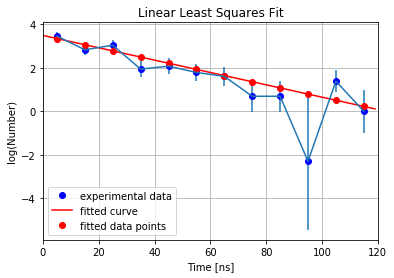

In [118]:
import numpy as np
x = range(5,120,10)    # time from 5 to 115 in steps of 10 (12 points)
Nd = len(x)   # number of data points
n_i = [32,17,21,7,8,6,5,2,2,0.1,4,1]
n_i = np.array(n_i)

y = log(n_i)   # log of number of counts

sig = n_i**-0.5 #error bars set more realistically

plot(x, y, 'bo', label = 'experimental data' )                                   # Plot data in blue

errorbar(x,y,sig)                                     # Plot error bars
title('Linear Least Squares Fit')                        # Plot figure
xlabel( 'Time [ns]' )                                            # Label axes
ylabel( 'log(Number)' )
grid(True)                                               # plot grid
xlim(0,120)                                              # x range for plot

ss = sx = sxx = sy = sxy = 0   # initialize various sums

for i in range(0, Nd):         # compute various sums over data points                              
    sig2 = sig[i] * sig[i]
    ss += 1. / sig2;    sx += x[i]/sig2;        sy += y[i]/sig2
    sxx += x[i] * x[i]/sig2;    sxy += x[i]*y[i]/sig2;
         
delta = ss*sxx-sx*sx
slope = (ss*sxy-sx*sy) / delta    #calculate best fit slope
inter = (sxx*sy-sx*sxy) / delta   # calculate best fit intercept
      
print('Linear Fit Final Results\n') 
print('y(x) = a + b x')                          # Desired fit
print('intercept = ', inter, '+/-', sqrt(sxx/delta))                  
print('slope = ', slope, '+/-', sqrt(ss/delta))
print('correlation =',-sx/sqrt(sxx*ss))

# red line is the fit, red dots the fits at y[i]
t = range(0,120,1)
curve  = inter + slope*t
points = inter + slope*x
plot(t, curve,'r', label='fitted curve')
plot(x, points, 'ro', label='fitted data points')
legend(loc = 'lower left')
show()

The intercept and slope did, in fact, change between problem 1 and problem 2. The intercept decreased slightly and the slope became less negative. 

In [119]:
tau = -1/slope
tau_uncertainty = (1/(slope**2))*(sqrt(ss/delta))
print('Tau = ' + str(tau) + ' +/- ' + str(tau_uncertainty))

Tau = 35.1750017208506 +/- 4.477116462080065


In [126]:
chi_2 = np.sum((y - (inter + slope * x))**2/(sig)**2)
chi_2

10.469097733132594

In [127]:
import scipy.special
parameters = 2
alpha = (Nd - parameters)/2
prob = scipy.special.gammaincc(alpha, chi_2)
prob

0.021528678882132883

The probability given by the regularized incomplete gamma function is ~.0215. This means that there is a 2.15% chance that if the experiment were performed again with random errors, the resultant chi squared value would be larger than what we have found. Therefore, there is a 97.85% chance that the chi squared value found by random chance would be smaller. Due to this, we can confirm that this is a poor fit.

### Problem 3

The following code will just run Professor Kaplan's code directly

1 2.3  1.1

2 4.2  2.3

3 7.6  2.1

4 15.4  2.7

5 28.9  3.3

6 40.0  4.2
best fit parameters a,b,c = [ 4.31349275 -3.61330881  1.62902431]
covariance matrix for the parameters a,b,c =
 [[ 1.48343423 -1.2247803   0.18654789]
 [-1.2247803   1.17393995 -0.1894382 ]
 [ 0.18654789 -0.1894382   0.03223888]]
uncertainties in parameters = [1.21796315 1.0834851  0.1795519 ]


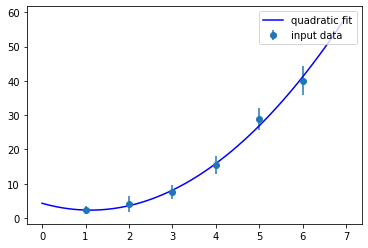

In [107]:
""" Example of curve fitting using scipy.optimize package
    Performs chi squared fit of data insample.txt file to qudratic function
    
    Lev Kaplan 2019"""

# Nonlinfit.py: Langrange interpolation tabulated data
    
from pylab import *
from scipy.optimize import curve_fit   # chi squared fitting

def func(x,a,b,c):   # define functional form
    return a + b*x + c*x*x

NMAX = 1000  # max number of input points

xin = zeros(NMAX)  # each is array of length NMAX, all elements set to zero
yin = zeros(NMAX)
sig = zeros(NMAX)

inputfile = open("sample.txt","r")  # read in the input x,y values
r = inputfile.readlines()  # read the whole file into list (one item per line)
inputfile.close()
        # input has the form: x0 y0 sig0
        #                     x1 y1 sig1
        #                     ...

m = 0
for line in r:
    print(line)
    s = line.split() # split line and split into list of items(assume items separated by spaces)
    xin[m] = s[0] # first number in each line is the x value
    yin[m] = s[1]
    sig[m] = s[2]
    m+=1         # m is total number of input data points
                 # will be stored in xin[0]..xin[n-1],yin[0]..yin[n-1]

popt,pcov = curve_fit(func, xin[0:m], yin[0:m], p0=[1,2,0], sigma=sig[0:m])

print("best fit parameters a,b,c =",popt)

print("covariance matrix for the parameters a,b,c =\n",pcov)

print("uncertainties in parameters =",sqrt(diag(pcov)))

xvalues = linspace(0,7,100)
yvalues = func(xvalues,popt[0],popt[1],popt[2])

errorbar(xin[0:m],yin[0:m],sig[0:m],fmt="o",label="input data")
plot(xvalues,yvalues,"b-",label="quadratic fit")
legend(loc="upper right")
show()

The next block of code is our modification to the functional form

0	10.6

25	16

50	45

75	83.5

100	52.8

125	19.9

150	10.8

175	8.25

200	4.7
best fit parameters a,b,c = [8.50351900e+01 1.29296779e-03 7.76567936e+01]
covariance matrix for the parameters a,b,c =
 [[1.57801760e+01 3.62087652e-04 2.82438804e-01]
 [3.62087652e-04 1.36492580e-08 1.17080812e-05]
 [2.82438804e-01 1.17080812e-05 1.23053948e+00]]
uncertainties in parameters = [3.97242697e+00 1.16830039e-04 1.10929684e+00]


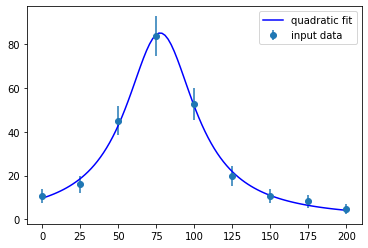

In [108]:
""" Example of curve fitting using scipy.optimize package
    Performs chi squared fit of data insample.txt file to qudratic function
    
    Lev Kaplan 2019"""

# Nonlinfit.py: Langrange interpolation tabulated data
    
from pylab import *
from scipy.optimize import curve_fit   # chi squared fitting

def func(x,a,b,c):   # define functional form
    return a/(1+b*(x-c)**2)

NMAX = 1000  # max number of input points


k = 1

inputfile = open("lagrange.dat","r")  # read in the input x,y values
r = inputfile.readlines()  # read the whole file into list (one item per line)
inputfile.close()
        # input has the form: x0 y0 sig0
        #                     x1 y1 sig1
        #                     ...

xin = zeros(len(r))  # each is array of length NMAX, all elements set to zero
yin = zeros(len(r))
sig = zeros(len(r))
        
m = 0
for line in r:
    print(line)
    s = line.split() # split line and split into list of items(assume items separated by spaces)
    xin[m] = s[0] # first number in each line is the x value
    yin[m] = s[1]
    sig[m] = k * (float(s[1])**0.5)
    m+=1         # m is total number of input data points
                 # will be stored in xin[0]..xin[n-1],yin[0]..yin[n-1]

popt,pcov = curve_fit(func, xin[0:m], yin[0:m], p0=[5, 7, 9], sigma=sig[0:m])

print("best fit parameters a,b,c =",popt)

print("covariance matrix for the parameters a,b,c =\n",pcov)

print("uncertainties in parameters =",sqrt(diag(pcov)))

xvalues = linspace(0,200,100)
yvalues = func(xvalues,popt[0],popt[1],popt[2])

errorbar(xin[0:m],yin[0:m],sig[0:m],fmt="o",label="input data")
plot(xvalues,yvalues,"b-",label="quadratic fit")
legend(loc="upper right")
title('Nonlinear fit for lagrange data')
xlabel('Energy (MeV)')
ylabel('Cross Section (mb)')
show()

In [109]:
print('best fit parameters for a, b, c: ', popt)

best fit parameters for a, b, c:  [8.50351900e+01 1.29296779e-03 7.76567936e+01]


The best values for A, B, and C are listed above. The Lorentzian equation Y=Amplitude/(1+((X-Center)/Width)^2)^2 will give us the meaning of parameters A, B, and C. A = amplitude, C = peak centroid, and B=(1/width)^2. B, therefore, is the decay rate of inverse lifetime. The signs of the correlations (covariance matrix elements) between the parameters indicate whether or not the parameters are negatively or positively correlated with each other. All of the covariance matrix elements are positive which means that the parameters are all positively correlated with each other. Amplitude increases as the peak increases which makes sense intuitively. Amplitude also increases as width increases as does the peak centroid. The best-fit function along with original data is plotted above

### Problem 4

In [110]:
chi_2 = np.sum((yin - func(xin, popt[0],popt[1],popt[2]))**2/(sig)**2)
print('chi squared value = ' + str(chi_2))

chi squared value = 1.2821240335057018


In [111]:
Nd = 9
parameters = 3
alpha = (Nd - parameters)/2
prob = (scipy.special.gammaincc(alpha, chi_2))
prob

0.86120912569055

The probability given by the regularized incomplete gamma function is ~.8612. This means that there is a 86.12% chance that if the experiment were performed again with random errors, the resultant chi squared value would be larger than what we have found. Therefore, there is a 13.88% chance that the chi squared value found by random chance would be smaller. Due to this, we can confirm that this is a reasonable fit

The fit is already reasonable, but if it were unreasonable and we wanted to make it reasonable, we would want to increase the k proportionality constant for the error to make each error bar a bit larger. With the larger chance of random errors, we are more likely to see that our curve fits into the error boundaries and less likely that a similar experiment with the same random error would be able to find a smaller chi squared value.

In [112]:
print("uncertainties in parameters a, b, c =",sqrt(diag(pcov)))

uncertainties in parameters a, b, c = [3.97242697e+00 1.16830039e-04 1.10929684e+00]


### Problem 5

0	10.6

25	16

50	45

75	83.5

100	52.8

125	19.9

150	10.8

175	8.25

200	4.7
best fit parameters a,b,c,d = [1.17204456e+04 1.78210434e-01 7.76567936e+01 1.37830540e+02]
covariance matrix for the parameters a,b,c,d =
 [[8.35351849e+20 1.27015935e+16 2.55854536e+10 9.82360836e+18]
 [1.27015935e+16 1.93128773e+11 3.89028926e+05 1.49368772e+14]
 [2.55854536e+10 3.89028926e+05 2.26028984e+00 3.00880972e+08]
 [9.82360836e+18 1.49368772e+14 3.00880972e+08 1.15524113e+17]]
uncertainties in parameters a,b,c,d = [2.89024540e+10 4.39464188e+05 1.50342603e+00 3.39888383e+08]


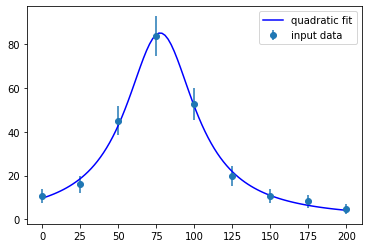

In [113]:
""" Example of curve fitting using scipy.optimize package
    Performs chi squared fit of data insample.txt file to qudratic function
    
    Lev Kaplan 2019"""

# Nonlinfit.py: Langrange interpolation tabulated data
    
from pylab import *
from scipy.optimize import curve_fit   # chi squared fitting

def func(x,a,b,c,d):   # define functional form
    return a/(d+b*(x-c)**2)

k = 1
inputfile = open("lagrange.dat","r")  # read in the input x,y values
r = inputfile.readlines()  # read the whole file into list (one item per line)
inputfile.close()
        # input has the form: x0 y0 sig0
        #                     x1 y1 sig1
        #                     ...

xin = zeros(len(r))  # each is array of length NMAX, all elements set to zero
yin = zeros(len(r))
sig = zeros(len(r))
        
m = 0
for line in r:
    print(line)
    s = line.split() # split line and split into list of items(assume items separated by spaces)
    xin[m] = s[0] # first number in each line is the x value
    yin[m] = s[1]
    sig[m] = k * (float(s[1])**0.5)
    m+=1         # m is total number of input data points
                 # will be stored in xin[0]..xin[n-1],yin[0]..yin[n-1]

popt,pcov = curve_fit(func, xin[0:m], yin[0:m], p0=[5, 7, 9, 7], sigma=sig[0:m])

print("best fit parameters a,b,c,d =",popt)

print("covariance matrix for the parameters a,b,c,d =\n",pcov)

print("uncertainties in parameters a,b,c,d =",sqrt(diag(pcov)))

xvalues = linspace(0,200,100)
yvalues = func(xvalues,popt[0],popt[1],popt[2], popt[3])

errorbar(xin[0:m],yin[0:m],sig[0:m],fmt="o",label="input data")
plot(xvalues,yvalues,"b-",label="quadratic fit")
legend(loc="upper right")
show()

In [114]:
chi_2 = np.sum((yin - func(xin, popt[0],popt[1],popt[2],popt[3]))**2/(sig)**2)
chi_2

1.2821240335060529

In [115]:
Nd = 9
parameters = 4
alpha = (Nd - parameters)/2
scipy.special.gammaincc(alpha, chi_2)

0.7667896193767493

Probability decreases when function is generalized to 76.679%. This actually implies that the fit has become worse as now, 23.321% of experiments done with similarly random data would be able to find a chi squared value smaller than what we found. This is more likely than someone finding a smaller chi squared value from our non-generalized function. We can see that the chi squared value between the two problems is the same, but the number of parameters to fit has now increased. Due to this, our fit is slightly worse. However, ~76% is still a very reasonable fit.